In [1]:
import pandas as pd

# Load the provided Excel file to examine its contents
file_path = 'SAT7HL.xlsx'
xls = pd.ExcelFile(file_path)

# Check the sheet names to identify where the "Tidy" data is located
xls.sheet_names


# Load the 'Tidy' sheet to analyze the data
df_tidy = pd.read_excel(file_path, sheet_name='tidy')

# Display the first few rows of the dataset to understand its structure
df_tidy.head()

,Animal_ID,Phenotype,Stimulus_Duration,Block_Number,CR,FA,HITS,MISS,OM
0,377,ST,0,Bloc1,17.0,2.0,NaN,NaN,0.0
1,377,ST,0,Bloc2,18.0,1.0,NaN,NaN,1.0
2,377,ST,0,Bloc3,18.0,3.0,NaN,NaN,0.0
3,377,ST,0,Bloc4,17.0,3.0,NaN,NaN,1.0
4,377,ST,0,Bloc5,12.0,6.0,NaN,NaN,1.0


In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from statsmodels.stats.anova import AnovaRM

# Filter data to include only rows with non-null 'HITS' values
hits_data = df_tidy.dropna(subset=["HITS"])

# Prepare the data for the mixed-design ANOVA
# We need to convert "Block_Number" into a numeric value for the repeated measures factor
hits_data["Block_Number"] = hits_data["Block_Number"].str.extract('(\d)').astype(int)



# Convert Phenotype and Stimulus_Duration to categorical types for the model
hits_data["Phenotype"] = hits_data["Phenotype"].astype("category")
hits_data["Stimulus_Duration"] = hits_data["Stimulus_Duration"].astype("category")

# Fit a mixed-effects linear model using 'HITS' as the dependent variable
# with Block_Number as a within-subject (random effect), and Phenotype and Stimulus_Duration as fixed effects
mixed_model = mixedlm(
    "HITS ~ Phenotype * Stimulus_Duration * Block_Number",
    data=hits_data,
    groups=hits_data["Animal_ID"],
    re_formula="~Block_Number"
)

# Fit the model
mixed_model_results = mixed_model.fit()

# Display the summary of the mixed-effects model
mixed_model_results.summary()


C:\Users\pfh3221\AppData\Local\Temp\ipykernel_36928\1820915092.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hits_data["Block_Number"] = hits_data["Block_Number"].str.extract('(\d)').astype(int)
C:\Users\pfh3221\AppData\Local\Temp\ipykernel_36928\1820915092.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hits_data["Phenotype"] = hits_data["Phenotype"].astype("category")
C:\Users\pfh3221\AppData\Local\Temp\ipykernel_36928\1820915092.py:16: SettingWithCopyWarning: 
A value is trying to be set on a

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
================================================================================================
Model:                          MixedLM              Dependent Variable:              HITS      
No. Observations:               630                  Method:                          REML      
No. Groups:                     42                   Scale:                           1.6500    
Min. group size:                15                   Log-Likelihood:                  -1107.8134
Max. group size:                15                   Converged:                       Yes       
Mean group size:                15.0                                                            
------------------------------------------------------------------------------------------------
                                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------
Intercept                                              5.625    0.567  9.914 0.000  4.513  6.737
Phenotype[T.IN]                                       -0.317    0.733 -0.432 0.666 -1.752  1.119
Phenotype[T.ST]                                       -0.275    0.663 -0.415 0.678 -1.574  1.024
Stimulus_Duration[T.50]                               -0.238    0.674 -0.353 0.724 -1.558  1.083
Stimulus_Duration[T.500]                               0.112    0.674  0.167 0.867 -1.208  1.433
Phenotype[T.IN]:Stimulus_Duration[T.50]                0.513    0.870  0.589 0.556 -1.192  2.217
Phenotype[T.ST]:Stimulus_Duration[T.50]               -0.394    0.787 -0.501 0.616 -1.936  1.147
Phenotype[T.IN]:Stimulus_Duration[T.500]               0.513    0.870  0.589 0.556 -1.192  2.217
Phenotype[T.ST]:Stimulus_Duration[T.500]               0.188    0.787  0.238 0.812 -1.354  1.729
Block_Number                                          -0.425    0.148 -2.878 0.004 -0.714 -0.136
Phenotype[T.IN]:Block_Number                           0.117    0.191  0.612 0.541 -0.257  0.490
Phenotype[T.ST]:Block_Number                           0.066    0.172  0.382 0.702 -0.272  0.404
Stimulus_Duration[T.50]:Block_Number                   0.063    0.203  0.308 0.758 -0.336  0.461
Stimulus_Duration[T.500]:Block_Number                  0.438    0.203  2.154 0.031  0.039  0.836
Phenotype[T.IN]:Stimulus_Duration[T.50]:Block_Number  -0.071    0.262 -0.270 0.787 -0.585  0.443
Phenotype[T.ST]:Stimulus_Duration[T.50]:Block_Number   0.215    0.237  0.906 0.365 -0.250  0.680
Phenotype[T.IN]:Stimulus_Duration[T.500]:Block_Number -0.246    0.262 -0.938 0.348 -0.760  0.268
Phenotype[T.ST]:Stimulus_Duration[T.500]:Block_Number -0.047    0.237 -0.196 0.844 -0.511  0.418
Group Var                                              0.761    0.249                           
Group x Block_Number Cov                               0.006    0.043                           
Block_Number Var                                       0.009    0.012                           
================================================================================================

"""

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Step 1: Calculate generalized eta-squared (η²)
# Extract variance components for generalized eta-squared calculation
variance_components = mixed_model_results.cov_re.iloc[0, 0]  # Group variance (random effect)
residual_variance = mixed_model_results.scale  # Residual variance (error)

# Total variance: Sum of group variance and residual variance
total_variance = variance_components + residual_variance

# Calculate η² for each significant effect (Block_Number, Stimulus_Duration:Block_Number)
eta_squared_block = variance_components / total_variance
eta_squared_stimulus_block = residual_variance / total_variance

# Step 2: Perform post-hoc tests for Block_Number (significant effect) and Stimulus_Duration:Block_Number
# Tukey HSD post-hoc for Block_Number
posthoc_block = pairwise_tukeyhsd(hits_data['HITS'], hits_data['Block_Number'])

# Check if Stimulus_Duration interaction is significant and perform post-hoc if needed
if mixed_model_results.pvalues['Stimulus_Duration[T.500]:Block_Number'] <= 0.05:
    posthoc_stimulus_block = pairwise_tukeyhsd(hits_data['HITS'], hits_data['Stimulus_Duration'])

# Display the results of the post-hoc analysis
posthoc_block_results = posthoc_block.summary()

# Prepare a final summary including generalized eta-squared
effect_size_summary = f"""
Generalized Eta-squared:
- Block Number: η² = {eta_squared_block:.3f}
- Stimulus Duration x Block Number: η² = {eta_squared_stimulus_block:.3f}

Post-hoc analysis (Tukey HSD for Block Number):
{posthoc_block_results}
"""

print(effect_size_summary)



Generalized Eta-squared:
- Block Number: η² = 0.316
- Stimulus Duration x Block Number: η² = 0.684

Post-hoc analysis (Tukey HSD for Block Number):
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.0714 0.9972 -0.5095  0.6523  False
     1      3   0.1032 0.9886 -0.4777  0.6841  False
     1      4  -0.0635 0.9983 -0.6444  0.5174  False
     1      5  -0.8889 0.0003 -1.4698  -0.308   True
     2      3   0.0317 0.9999 -0.5492  0.6127  False
     2      4  -0.1349 0.9693 -0.7158   0.446  False
     2      5  -0.9603 0.0001 -1.5412 -0.3794   True
     3      4  -0.1667  0.935 -0.7476  0.4142  False
     3      5  -0.9921    0.0  -1.573 -0.4112   True
     4      5  -0.8254 0.0011 -1.4063 -0.2445   True
----------------------------------------------------



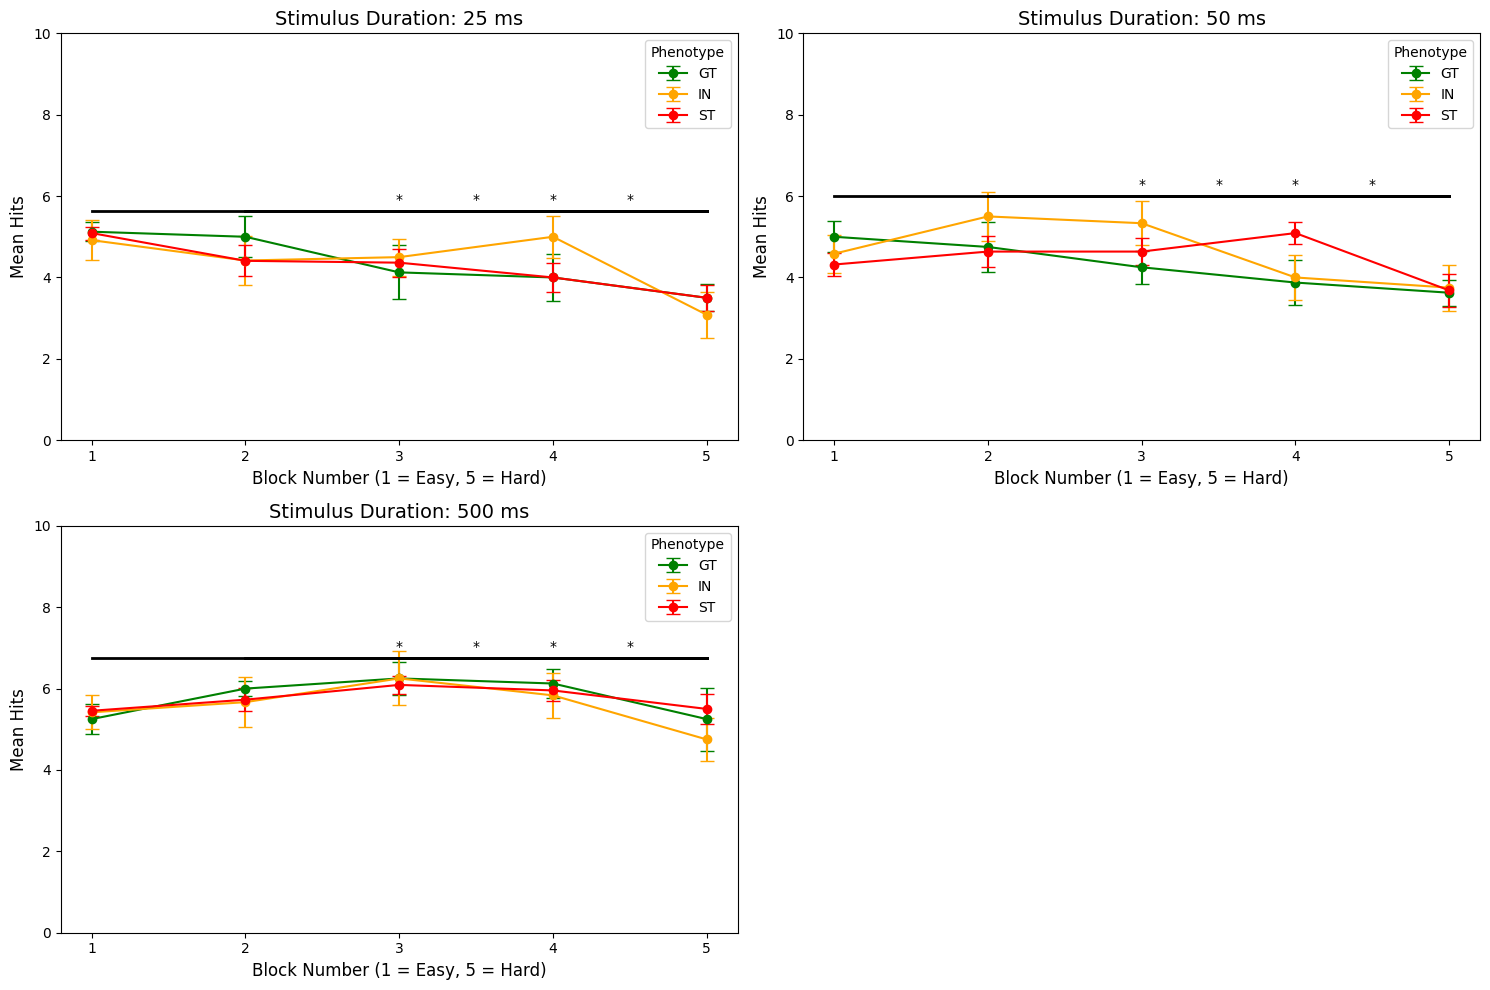

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for visualization: calculate the mean and standard error for HITS across blocks
plot_data = hits_data.groupby(["Phenotype", "Stimulus_Duration", "Block_Number"]).agg(
    mean_hits=("HITS", "mean"),
    se_hits=("HITS", "sem")
).reset_index()

# Define a color palette for the Phenotype groups
custom_palette = {"ST": "red", "IN": "orange", "GT": "green"}

# Define the significant block comparisons based on your post-hoc results
significant_pairs = [(1, 5), (2, 5), (3, 5), (4, 5)]  # Block comparisons with significant differences

# Create separate plots for each Stimulus Duration
stimulus_durations = plot_data["Stimulus_Duration"].unique()
plt.figure(figsize=(15, 10))

# Loop through each stimulus duration and plot separately
for i, duration in enumerate(stimulus_durations):
    plt.subplot(2, 2, i + 1)
    
    # Filter the data for the current stimulus duration
    data_subset = plot_data[plot_data["Stimulus_Duration"] == duration]
    
    # Plot with SEM error bars and custom colors for each phenotype
    for phenotype in data_subset["Phenotype"].unique():
        phenotype_data = data_subset[data_subset["Phenotype"] == phenotype]
        
        plt.errorbar(
            phenotype_data["Block_Number"],
            phenotype_data["mean_hits"],
            yerr=phenotype_data["se_hits"],
            label=phenotype,
            fmt='-o',  # Line with circles at the data points
            color=custom_palette[phenotype],  # Apply the custom color for each phenotype
            capsize=5  # Error bar caps
        )
    
    # Add labels and title
    plt.title(f"Stimulus Duration: {duration} ms", fontsize=14)
    plt.xlabel("Block Number (1 = Easy, 5 = Hard)", fontsize=12)
    plt.ylabel("Mean Hits", fontsize=12)
    plt.xticks(ticks=[1, 2, 3, 4, 5])
    plt.ylim([0, 10])  # Y-axis will range from 0 to 10

    
    # Highlight the significant differences from post-hoc tests
    for (x1, x2) in significant_pairs:
        plt.plot([x1, x2], [data_subset['mean_hits'].max() + 0.5] * 2, 'k-', lw=2)
        plt.text((x1 + x2) / 2, data_subset['mean_hits'].max() + 0.6, "*", ha='center', va='bottom', color='black')

    # Adjust the legend
    plt.legend(title="Phenotype", loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# To compute the mean and standard deviation for each phenotype and stimulus duration group
# and then plot those values with error bars.

import numpy as np

# Group by Stimulus_Duration, Block_Number, and Phenotype, then calculate mean and std for HITS
grouped_data = tidy_filtered.groupby(['Stimulus_Duration', 'Block_Number', 'Phenotype']).agg(
    mean_hits=('HITS', 'mean'),
    std_hits=('HITS', 'std')
).reset_index()

# Set the figure for 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot each stimulus duration
for ax, stimulus_duration in zip(axes, stimulus_durations):
    for phenotype in phenotypes:
        # Filter data by stimulus duration and phenotype
        data = grouped_data[(grouped_data['Stimulus_Duration'] == stimulus_duration) & 
                            (grouped_data['Phenotype'] == phenotype)]
        ax.errorbar(data['Block_Number'], data['mean_hits'], yerr=data['std_hits'], 
                    label=phenotype, color=phenotype_colors[phenotype], capsize=5)

    ax.set_title(f'Stimulus Duration: {stimulus_duration}')
    ax.set_xlabel('Block Number')
    ax.set_ylim(y_min, y_max)

axes[0].set_ylabel('Mean Hits Rate')
plt.legend(title='Phenotype')

# Show the side-by-side plots
plt.tight_layout()
plt.show()

# Now, let's generate a separate plot for the merged data (all stimulus durations combined)
plt.figure(figsize=(5, 5))

for phenotype in phenotypes:
    data = grouped_data[grouped_data['Phenotype'] == phenotype]
    plt.errorbar(data['Block_Number'], data['mean_hits'], yerr=data['std_hits'], 
                 label=phenotype, color=phenotype_colors[phenotype], capsize=5)

plt.title('Merged Stimulus Durations')
plt.xlabel('Block Number')
plt.ylabel('Mean Hits Rate')
plt.ylim(y_min, y_max)
plt.legend(title='Phenotype')
plt.tight_layout()
plt.show()


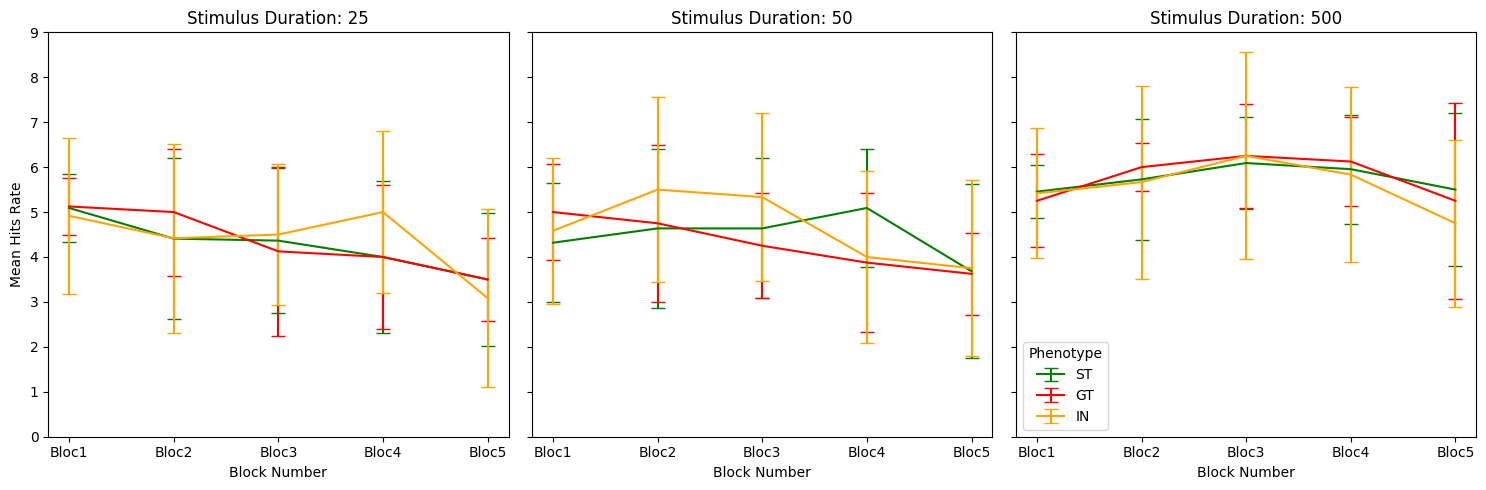

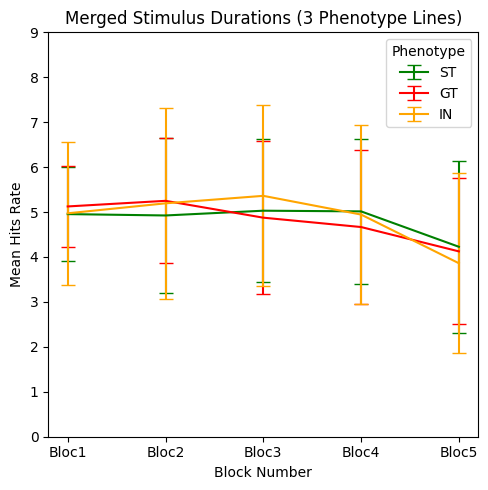

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the spreadsheet
file_path = 'SAT7HL.xlsx'
xls = pd.ExcelFile(file_path)

# Load the data from the 'tidy' sheet
tidy_df = pd.read_excel(xls, sheet_name='tidy')

# Filter out NaN in 'HITS' as we are focusing on that metric
tidy_filtered = tidy_df.dropna(subset=['HITS'])

# Get unique stimulus durations and phenotypes
stimulus_durations = tidy_filtered['Stimulus_Duration'].unique()
phenotypes = tidy_filtered['Phenotype'].unique()

# Define colors for phenotypes
phenotype_colors = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Group by Stimulus_Duration, Block_Number, and Phenotype, then calculate mean and std for HITS
grouped_data = tidy_filtered.groupby(['Stimulus_Duration', 'Block_Number', 'Phenotype']).agg(
    mean_hits=('HITS', 'mean'),
    std_hits=('HITS', 'std')
).reset_index()

# Set the figure for 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set common y-axis limits based on the data
y_min, y_max = tidy_filtered['HITS'].min(), tidy_filtered['HITS'].max()

# Plot each stimulus duration
for ax, stimulus_duration in zip(axes, stimulus_durations):
    for phenotype in phenotypes:
        # Filter data by stimulus duration and phenotype
        data = grouped_data[(grouped_data['Stimulus_Duration'] == stimulus_duration) & 
                            (grouped_data['Phenotype'] == phenotype)]
        ax.errorbar(data['Block_Number'], data['mean_hits'], yerr=data['std_hits'], 
                    label=phenotype, color=phenotype_colors[phenotype], capsize=5)

    ax.set_title(f'Stimulus Duration: {stimulus_duration}')
    ax.set_xlabel('Block Number')
    ax.set_ylim(y_min, y_max)

axes[0].set_ylabel('Mean Hits Rate')
plt.legend(title='Phenotype')

# Show the side-by-side plots
plt.tight_layout()
plt.show()

# Now, let's generate the merged plot (all stimulus durations combined)

# Group by Block_Number and Phenotype to merge across stimulus durations
merged_data = tidy_filtered.groupby(['Block_Number', 'Phenotype']).agg(
    mean_hits=('HITS', 'mean'),
    std_hits=('HITS', 'std')
).reset_index()

# Plot the merged data with mean and std across all stimulus durations
plt.figure(figsize=(5, 5))

for phenotype in phenotypes:
    data = merged_data[merged_data['Phenotype'] == phenotype]
    plt.errorbar(data['Block_Number'], data['mean_hits'], yerr=data['std_hits'], 
                 label=phenotype, color=phenotype_colors[phenotype], capsize=5)

plt.title('Merged Stimulus Durations (3 Phenotype Lines)')
plt.xlabel('Block Number')
plt.ylabel('Mean Hits Rate')
plt.ylim(y_min, y_max)
plt.legend(title='Phenotype')
plt.tight_layout()
plt.show()
